# Assignment 1 (2018-03-21)
 - The top 10 journals that published papers on this topic ==> Title
 - The top 10 authors ==> LastName, ForeName
 - A histogram of the number of papers published with 5-year intervals ==> years
 - The top 10 terms that appear in the
    - a. Title of the paper
    - b. Abstract of the paper

In [1]:
from bs4 import BeautifulSoup
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import requests

# Parsing data

In [2]:
# start = 1
# fin = 100
mindate = 1950
maxdate = 2018  #Set Date
term = "(emotions)%20AND%20skin%20conductance" # Set key words
count_url = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&retmode=xml&&term=%s&mindate=%s&maxdate=%s'%(term, mindate, maxdate)
responses = requests.get(count_url)
count_soup = BeautifulSoup(responses.content, "lxml-xml")
counts = count_soup.findAll('Count')[0].contents[0]
print(counts)  #first I counted all paper

url = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&retmode=xml&retmax=%s&term=%s&mindate=%s&maxdate=%s'%(counts, term, mindate, maxdate)
responses = requests.get(url)
soup = BeautifulSoup(responses.content, "lxml-xml")

id_list = []

for i in soup.findAll('Id'):
    id_list.append(i.contents[0])
    
print("Finished Add ID lists")

1381
Finished Add ID lists


## Test nltk library

In [3]:
zen = "hello my world, we are one. hello my child, you are my world"
tokenizer = RegexpTokenizer(r'\w+')
zen_no_punc = tokenizer.tokenize(zen)
for i in (w.title() for w in zen_no_punc if w.lower() not in stopwords.words()):
    print(i)

Hello
World
One
Hello
Child
World


# Author, Year, Journal, Title, Abstract

In [4]:
name_list = []
name = ""
error_url = []

# author, year, Journal, Title, Abstract count dictionary setting
author = defaultdict(lambda: 0)
year_count = defaultdict(lambda: 0)
journal_count = defaultdict(lambda: 0)
title_term = defaultdict(lambda: 0)
abstract_term = defaultdict(lambda: 0)

tokenizer = RegexpTokenizer(r'\w+')

here = 0

for i in range(len(id_list)):
    here += 1
    
    url_detail = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=%d'%(int(id_list[i]))
#     print("%d: %s"%(here, url_detail))
    
    try:
        detail_responses = requests.get(url_detail)
        detail_soup = BeautifulSoup(detail_responses.content, 'lxml-xml')
    except:
        error_url.append(url_detail)
    
    '''
    Gathering Author's LastName & ForeName
    '''
    try:
        a = detail_soup.findAll(['LastName','ForeName'])
        for i, j in enumerate(a):
            if i%2 == 0:
                name += j.contents[0]
            else:
                name += " " + j.contents[0]
                author[name] += 1
                name = ""
    except:
        pass

    '''
    Gathering Article Title Terms
    '''
    try:
        zen = detail_soup.ArticleTitle.string
        zen_no_punc = tokenizer.tokenize(zen)
        for i in (w.title() for w in zen_no_punc if w.lower() not in stopwords.words()):
            title_term[i] += 1
    except:
        pass
    
    '''
    Gathering Abstract Terms
    '''
    try:
        zen = detail_soup.AbstractText.string
        zen_no_punc = tokenizer.tokenize(zen)
        for i in (w.title() for w in zen_no_punc if w.lower() not in stopwords.words()):
            abstract_term[i] += 1
    except:
        pass
    
    '''
    Journal Count
    '''
    try:
        journal_count[detail_soup.Title.string] += 1
    except:
        pass
    
    '''
    Year Count
    '''
    try:
        year_count[detail_soup.Year.string] += 1
    except:
        pass
    
print("Finished!")

Finished!


## Top 10 Author
 - <strong>Rudolf Stark</strong>, <strong>Margaret M Bradley</strong>, <strong>Christian J Merz</strong> also counted 13

In [12]:
s_author = [(k,author[k]) for k in sorted(author, key=author.get, reverse=True)]
top = 0
for k, v in s_author:
    top += 1
    print(k,v)
    if(top == 10):
        break
     

Milad Mohammed R 30
Orr Scott P 30
Pitman Roger K 20
Rhudy Jamie L 15
Kindt Merel 15
Flor Herta 14
Phelps Elizabeth A 14
Pauli Paul 14
Lang Peter J 13
Dunsmoor Joseph E 13


## Top 10 Journal

In [13]:
s_journal = [(k,journal_count[k]) for k in sorted(journal_count, key=journal_count.get, reverse=True)]
top = 0
for k, v in s_journal:
    top += 1
    print(k,v)
    if(top == 10):
        break

International journal of psychophysiology : official journal of the International Organization of Psychophysiology 88
Psychophysiology 86
Biological psychology 76
PloS one 48
Behaviour research and therapy 44
Biological psychiatry 31
Emotion (Washington, D.C.) 30
Psychiatry research 23
Psychopharmacology 22
Journal of behavior therapy and experimental psychiatry 22


# Top 10 terms (title, abstarct)

In [14]:
s_title_term = [(k,title_term[k]) for k in sorted(title_term, key=title_term.get, reverse=True)]
top = 0
for k, v in s_title_term:
    top += 1
    print(k,v)
    if(top == 10):
        break

Fear 344
Responses 213
Emotional 199
Anxiety 150
Effects 144
Conditioning 135
Physiological 124
Skin 124
Conductance 118
Autonomic 117


In [15]:
s_abstract_term = [(k,abstract_term[k]) for k in sorted(abstract_term,
                                                        key=abstract_term.get,
                                                        reverse=True)]
top = 0
for k, v in s_abstract_term:
    top += 1
    print(k,v)
    if(top == 10):
        break

Fear 1694
Skin 1537
Conductance 1480
Responses 1365
Emotional 1160
Anxiety 948
Response 918
Study 815
Extinction 776
Participants 767


# 5-years interval histogram(Jaeyung's)
 - jaeyung's - counted first appeared year tag
 - jooyeon's - counted PubDate/Year tag
     - suppose jooyeon's data more accurate

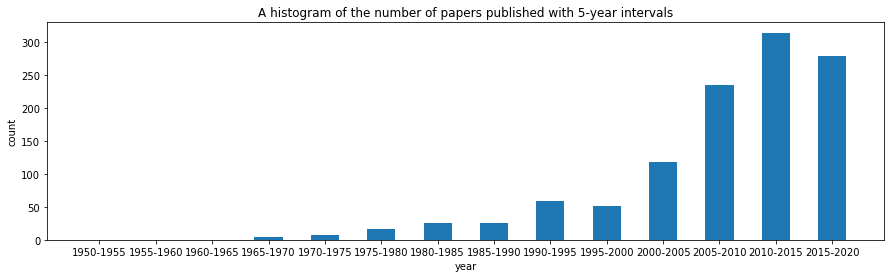

OrderedDict([('1950-1955', 0), ('1955-1960', 0), ('1960-1965', 0), ('1965-1970', 4), ('1970-1975', 7), ('1975-1980', 16), ('1980-1985', 26), ('1985-1990', 26), ('1990-1995', 59), ('1995-2000', 52), ('2000-2005', 118), ('2005-2010', 235), ('2010-2015', 314), ('2015-2020', 278)])


In [9]:
import matplotlib.pyplot as plt
import collections
import pandas as pd
# 5-years interval
f_year = collections.OrderedDict()
start = 1950
count = 0
for i in range(1950, 2021):
#     print(i, year_count[str(i)])
    if(i % 5 == 0) and (i != 1950):
        end = i
        f_year[str(start)+"-"+str(end)] = count
        count = 0
        start = i
    else:
        count += year_count[str(i)]
        
# print(f_year)
x = []
y = []
for k,v in f_year.items():
    x.append(k)
    y.append(v)
    
# print(x)
# print(y)
test = [i for i in range(len(y))]
plt.figure(figsize=(15, 4))

plt.bar(test, y, align='center', width= 0.5)
plt.title("A histogram of the number of papers published with 5-year intervals")
plt.xlabel("year")
plt.xticks(test, x)
plt.ylabel("count")
plt.show()

print(f_year)

# 5-years interval histogram(Jooyeon's)

<img src="jooyeon1.png">

<img src="jooyeon.png">